<a href="https://colab.research.google.com/github/tchintchie/Flu/blob/master/Flu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import io
import requests
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium
from folium import plugins
plt.rcParams["figure.figsize"]=10,12
import warnings
warnings.filterwarnings("ignore")

In [2]:
ytd_url="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-29-2020.csv"
dbd_conf_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
dbd_death_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
dbd_rec_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"

s=requests.get(ytd_url).content
df=pd.read_csv(io.StringIO(s.decode('utf-8')))

s1=requests.get(dbd_conf_url).content
dbd_conf=pd.read_csv(io.StringIO(s1.decode('utf-8')))

s2=requests.get(dbd_death_url).content
dbd_death=pd.read_csv(io.StringIO(s2.decode('utf-8')))

s3=requests.get(dbd_rec_url).content
dbd_rec=pd.read_csv(io.StringIO(s3.decode('utf-8')))

df.head()

FIPS     Admin2  ... Active                   Combined_Key
0  45001.0  Abbeville  ...      0  Abbeville, South Carolina, US
1  22001.0     Acadia  ...      0          Acadia, Louisiana, US
2  51001.0   Accomack  ...      0         Accomack, Virginia, US
3  16001.0        Ada  ...      0                 Ada, Idaho, US
4  19001.0      Adair  ...      0                Adair, Iowa, US

[5 rows x 12 columns]

In [0]:
df.rename(columns={"Admin2":"City"},inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3434 entries, 0 to 3433
Data columns (total 12 columns):
FIPS              3148 non-null float64
City              3174 non-null object
Province_State    3261 non-null object
Country_Region    3434 non-null object
Last_Update       3434 non-null object
Lat               3434 non-null float64
Long_             3434 non-null float64
Confirmed         3434 non-null int64
Deaths            3434 non-null int64
Recovered         3434 non-null int64
Active            3434 non-null int64
Combined_Key      3434 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 322.1+ KB


In [5]:
totals = df.groupby("Country_Region")["Confirmed","Deaths","Recovered","Active"].sum().sort_values(by="Confirmed",ascending=False).head(10).style.background_gradient(cmap="Reds")
totals

In [6]:
map = folium.Map(zoom_start=4,tiles="Stamenterrain")
for lat, lon, value, name in zip(df.Lat, df.Long_, df.Deaths, df.Country_Region):
  folium.CircleMarker([lat,lon], radius=value*0.003,popup=("<strong>State</strong>: "+str(name).capitalize()+"<br>""<strong>Total Deaths</strong>: " +str(value)+"<br>"),color="red", fill_color="red",fill_opacity=0.3).add_to(map)

map


In [7]:
top20 = df.groupby("Country_Region")["Confirmed","Deaths","Recovered","Active"].sum().sort_values(by="Confirmed",ascending=False).head(20)
top20

Confirmed  Deaths  Recovered  Active
Country_Region                                      
US                 140886    2467       2665       0
Italy               97689   10779      13030   73880
China               82122    3304      75582    3236
Spain               80110    6803      14709   58598
Germany             62095     533       9211   52351
France              40708    2611       7226   30871
Iran                38309    2640      12391   23278
United Kingdom      19780    1231        151   18398
Switzerland         14829     300       1595   12934
Netherlands         10930     772        253    9905
Belgium             10836     431       1359    9046
Korea, South         9583     152       5033    4398
Turkey               9217     131        105    8981
Austria              8788      86        479    8223
Canada               6280      64        466       0
Portugal             5962     119         43    5800
Norway               4284      25          7    4252
Brazil               4256     136          6    4114
Israel               4247      15        132    4100
Australia            3984      16        244    3724

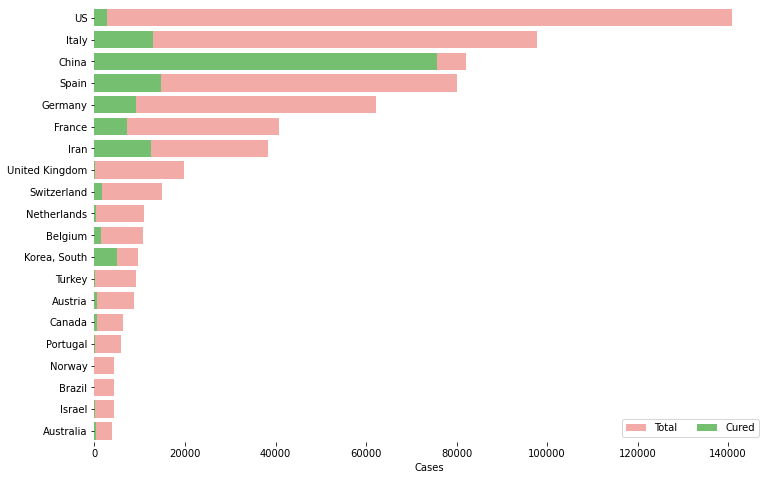

In [8]:
fig, ax = plt.subplots(figsize=(12,8))
top20.sort_values("Confirmed", ascending=False, inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="Confirmed",y=top20.index, data = top20, label="Total", color="r")
sns.set_color_codes("muted")
sns.barplot(x="Recovered", y= top20.index, data = top20, label="Cured", color="g")
ax.legend(ncol=2, loc="lower right", frameon = True)
ax.set(ylabel="", xlabel="Cases")
sns.despine(left=True, bottom=True)

In [9]:
dbd_conf["Status"] = "Confirmed"
dbd_conf.head()

Province/State Country/Region      Lat  ...  3/29/20  3/30/20     Status
0            NaN    Afghanistan  33.0000  ...      120      170  Confirmed
1            NaN        Albania  41.1533  ...      212      223  Confirmed
2            NaN        Algeria  28.0339  ...      511      584  Confirmed
3            NaN        Andorra  42.5063  ...      334      370  Confirmed
4            NaN         Angola -11.2027  ...        7        7  Confirmed

[5 rows x 74 columns]

In [0]:
dbd_death["Status"] = "Diseased"

In [0]:
dbd_rec["Status"] = "Recovered"

In [0]:
dbd_conf = dbd_conf.melt(id_vars=["Province/State", "Country/Region","Lat","Long","Status"],var_name="Date", value_name="Value")
dbd_death = dbd_death.melt(id_vars=["Province/State", "Country/Region","Lat","Long","Status"],var_name="Date", value_name="Value")
dbd_rec = dbd_rec.melt(id_vars=["Province/State", "Country/Region","Lat","Long","Status"],var_name="Date", value_name="Value")


In [0]:
dbd_rec.Date = pd.to_datetime(dbd_rec.Date)
dbd_conf.Date = pd.to_datetime(dbd_conf.Date)
dbd_death.Date = pd.to_datetime(dbd_death.Date)

In [0]:
austria = dbd_conf[dbd_conf["Country/Region"]=="Austria"]
usa = dbd_conf[dbd_conf["Country/Region"]=="US"]
italy = dbd_conf[dbd_conf["Country/Region"]=="Italy"]

In [0]:
import plotly
plotly.io.renderers.default = "colab"

In [16]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=austria.Date, y= austria.Value,mode="lines+markers",name="Total Cases Austria"))
fig.add_trace(go.Scatter(x=usa.Date, y= usa.Value,mode="lines+markers",name="Total Cases USA"))

fig.update_layout(title_text="Trend of Coronavirus Cases in Austria vs USA", plot_bgcolor="rgb(230,230,230)")
fig.show()

In [19]:
fig = px.bar(austria, x="Date",y="Value", color="Value", orientation="v", height=600, title="Confirmed Cases in Austria", color_discrete_sequence=px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor="rgb(230,230,230)")
fig.show()

fig = px.bar(usa, x="Date",y="Value", color="Value", orientation="v", height=600, title="Confirmed Cases in America", color_discrete_sequence=px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor="rgb(230,230,230)")
fig.show()

In [23]:
from plotly.subplots import make_subplots

fig = make_subplots(rows = 2, cols = 2, specs=[[{},{}],[{"colspan":2},None]],subplot_titles=("Italy", "USA","Austria"))

fig.add_trace(go.Bar(x=italy.Date, y=italy.Value, marker = dict(color=italy.Value, coloraxis="coloraxis")),1,1)
fig.add_trace(go.Bar(x=usa.Date, y=usa.Value, marker = dict(color=usa.Value, coloraxis="coloraxis")),1,2)
fig.add_trace(go.Bar(x=austria.Date, y=austria.Value, marker = dict(color=austria.Value, coloraxis="coloraxis")),2,1)

fig.update_layout(coloraxis=dict(colorscale="Bluered_r"), showlegend=False, title_text = "Total Confimred Cases")
fig.update_layout(plot_bgcolor="rgb(230,230,230)")
fig.show()
